# Ensemble Methods

In [2]:
#Exploração de dados
import pandas as pd

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#https://archive.ics.uci.edu/ml/datasets/Wine
#Bruno
#df = pd.read_csv('/content/drive/MyDrive/EIA - Estudos em inteligência artificial/Tópico 2/Ensemble/wine.data', header = None, names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline '])
#Antonio
df = pd.read_csv('./assets/dataset/wine.data', header = None, names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline '])

In [5]:
df.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
35,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
44,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510


In [6]:
#Mostra o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

[]

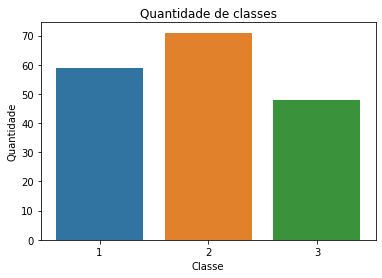

In [7]:
ax = sns.countplot(x='Class',data=df)
ax.set(xlabel='Classe', ylabel='Quantidade', title='Quantidade de classes')
ax.plot()

In [8]:
print(f"Quantidade total de todas as classes: {df.Class.size}")

Quantidade total de todas as classes: 178


[]

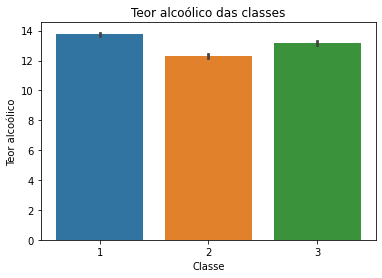

In [9]:
ax = sns.barplot(x='Class', y='Alcohol', data=df)
ax.set(xlabel='Classe', ylabel='Teor alcoólico', title='Teor alcoólico das classes')
ax.plot()

[]

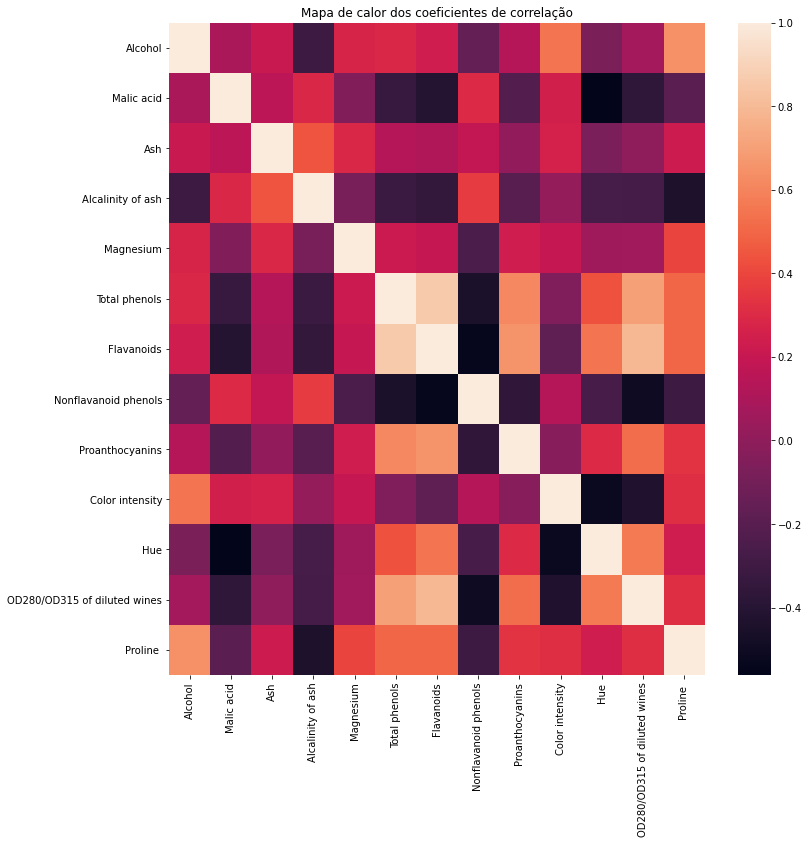

In [10]:
correlation = (df.drop('Class', axis = 1)).corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation)
ax.set(title='Mapa de calor dos coeficientes de correlação')
ax.plot()

In [11]:
#Importando train_test_split para dividir os dados
from sklearn.model_selection import train_test_split

#Definindo X e Y
y = df['Class']
X = df.drop('Class',axis=1)

#Guardando os dados retornados pela train_test_split() em seus respectivos lugares
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Random Forest Classifier

In [12]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Instantiate model with 20 decisions  trees
model = RandomForestClassifier(n_estimators = 20, random_state = 30)

#Train the model
model.fit(X_train,y_train)
prediction_test = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Alcohol                         0.173843
Color intensity                 0.171546
Proline                         0.170276
Flavanoids                      0.124004
OD280/OD315 of diluted wines    0.117360
Total phenols                   0.058934
Hue                             0.049058
Proanthocyanins                 0.038778
Magnesium                       0.026256
Ash                             0.026174
Malic acid                      0.022333
Alcalinity of ash               0.014384
Nonflavanoid phenols            0.007053
dtype: float64


In [14]:
#Comparando os dados e printando os resultados
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



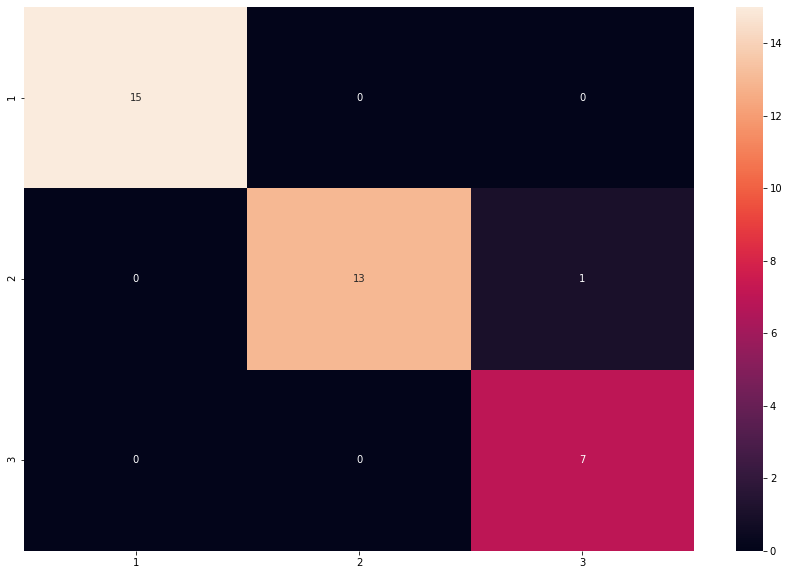

In [15]:
# Matriz de confusão do RandomForest
cmat = confusion_matrix(y_test, prediction_test)
cmat = pd.DataFrame(cmat, index=["1", "2", "3"], columns=["1", "2", "3"])

plt.figure(figsize=(15, 10))
ax = sns.heatmap(cmat, annot=True)

**Testando outros Hiperparâmetros**

# Boosting Classifier

In [16]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

#Instantiate model with 
model = AdaBoostClassifier(n_estimators=20, random_state=30)

#Train the model
model.fit(X_train,y_train)
prediction_test = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Flavanoids                      0.40
Hue                             0.20
OD280/OD315 of diluted wines    0.10
Proline                         0.10
Alcohol                         0.05
Alcalinity of ash               0.05
Total phenols                   0.05
Color intensity                 0.05
Malic acid                      0.00
Ash                             0.00
Magnesium                       0.00
Nonflavanoid phenols            0.00
Proanthocyanins                 0.00
dtype: float64


In [18]:
#Comparando os dados e printando os resultados
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



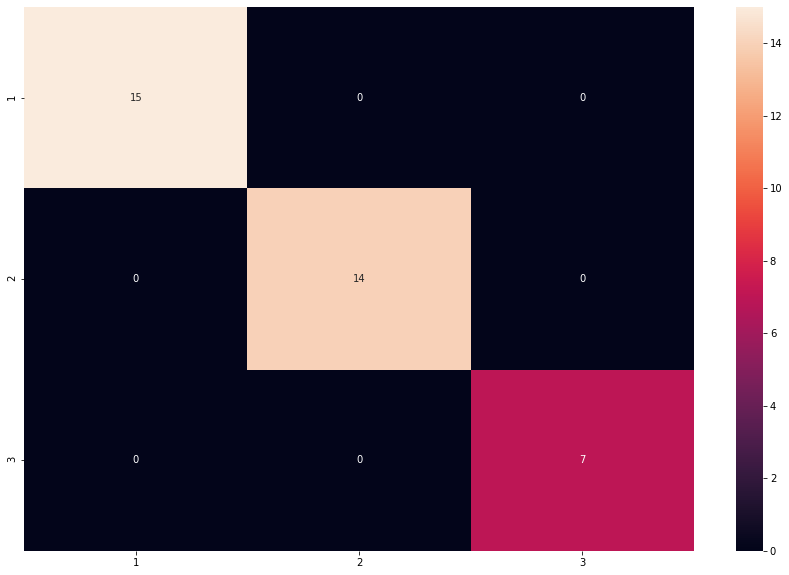

In [19]:
# Matriz de confusão do AdaBoost
cmat = confusion_matrix(y_test, prediction_test)
cmat = pd.DataFrame(cmat, index=["1", "2", "3"], columns=["1", "2", "3"])

plt.figure(figsize=(15, 10))
ax = sns.heatmap(cmat, annot=True)